# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt

In [9]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [10]:
# Convert the date column format from string to datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [11]:
# Set the date column as the DataFrame index
df = df.set_index("date")
df

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [25]:
# Drop the date column
df_dateless = df.reset_index()
df_dateless = df_dateless.drop(columns=['date'])
df_dateless

,station,prcp,tobs
0,USC00519397,0.08,65
1,USC00519397,0.00,63
2,USC00519397,0.00,74
3,USC00519397,0.00,76
4,USC00519397,NaN,73
...,...,...,...
19545,USC00516128,0.09,71
19546,USC00516128,NaN,78
19547,USC00516128,0.56,76
19548,USC00516128,0.50,76


### Compare June and December data across all years 

In [4]:
from scipy import stats

In [13]:
# Filter data for desired months
june_df = df.filter(regex="\d\d\d\d-06-\d\d", axis=0).sort_index()
june_df

,station,prcp,tobs
date,,,
2010-06-01,USC00519397,0.00,78
2010-06-01,USC00514830,0.01,73
2010-06-01,USC00517948,0.00,77
2010-06-01,USC00518838,NaN,69
2010-06-01,USC00519523,0.03,76
...,...,...,...
2017-06-30,USC00519281,0.01,76
2017-06-30,USC00519397,0.08,75
2017-06-30,USC00519523,0.07,75


In [14]:
def get_years(data):
    min_date = min(data.index)
    max_date = max(data.index)
    return list(range(min_date.year, max_date.year))

In [18]:
# Identify the average temperature for June
june_data = {}
for year in get_years(june_df):
    key = str(year)
    value = june_df.filter(regex = f"{year}-\d\d-", axis=0)["tobs"]
    june_data[key] = value
    print(f"year: {year}, avg temp: {round(value.mean(), 2)}")

year: 2010, avg temp: 74.93
year: 2011, avg temp: 73.94
year: 2012, avg temp: 74.0
year: 2013, avg temp: 74.6
year: 2014, avg temp: 75.03
year: 2015, avg temp: 74.99
year: 2016, avg temp: 75.18


In [20]:
# Identify the average temperature for December
december_df = df.filter(regex="\d\d\d\d-12-\d\d", axis=0).sort_index()
december_data = {}
for year in get_years(december_df):
    key = str(year)
    value = december_df.filter(regex = f"{year}-\d\d-", axis=0)["tobs"]
    june_data[key] = value
    print(f"year: {year}, avg temp: {round(value.mean(), 2)}")

year: 2010, avg temp: 70.21
year: 2011, avg temp: 70.82
year: 2012, avg temp: 71.19
year: 2013, avg temp: 71.09
year: 2014, avg temp: 69.9
year: 2015, avg temp: 73.42


In [21]:
# Run paired t-test
t_value, p_value = stats.ttest_ind(june_df["tobs"], december_df["tobs"])
print(f"t-value: {t_value}")
print(f"p-value: {p_value}")

t-value: 31.60372399000329
p-value: 3.9025129038616655e-191


### Analysis

In [23]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as tick

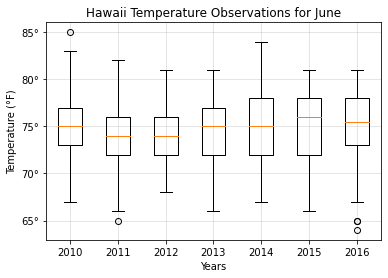

In [27]:
years = get_years(june_df)
fig, ax = plt.subplots(1, 1)
plt.boxplot(
    [june_df.filter(regex = f"{year}-\d\d-", axis=0)["tobs"]
    for year in years], 
    vert=True, 
    labels=years)
ax.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}°')) 
plt.title(f'Hawaii Temperature Observations for June')
plt.xlabel('Years')
plt.ylabel('Temperature (°F)')
plt.grid(alpha = 0.4)
plt.savefig('Images/june_temp.png')
plt.show()

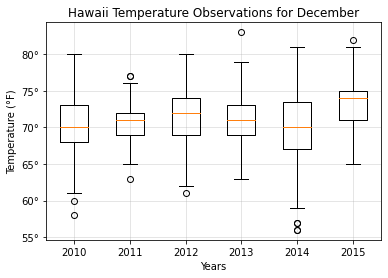

In [28]:
years = get_years(december_df)
fig, ax = plt.subplots(1, 1)
plt.boxplot(
    [december_df.filter(regex = f"{year}-\d\d-", axis=0)["tobs"]
    for year in years], 
    vert=True, 
    labels=years)
ax.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}°')) 
plt.title(f'Hawaii Temperature Observations for December')
plt.xlabel('Years')
plt.ylabel('Temperature (°F)')
plt.grid(alpha = 0.4)
plt.savefig('Images/june_temp.png')
plt.show()

1. Use the t-test to determine whether the difference in the means, if any, is statistically significant. 

    The t-value is very high, so we are under the assumption that the hypothesis is null. THe p-value is also very close to zero, so no     significant correlation was found. 

2. Will you use a paired t-test, or an unpaired t-test? Why?

    We will be using an unpaired t-test, mostly because the two months are unrelated. They also don't share the same amount of values. 
